> ### <font color= "purple" >**PROYECTO FINAL**</font><font color= "purple" >_CLUSTERING</font>

El objetivo de este proyecto es analizar, clasificar y predecir mediante NLP tweets que versan sobre el movimiento feminista, y como se habla de el en las redes. Hemos escogido twitter como medio para formar nuestro dataset, ya que en base a las circunstancias presentes este año ante el 8M, en dicha plataforma se ha generado mucha controversia. A través de las publicaciones de los usuarios de esta plataforma hemos obtenido información sobre dicho tema.
Nuestra hipótesis inicial ha sido poder predecir si un tweet sin hashtag y teniendo en cuenta el lenguaje utilizado iba a llevar asociado el hashtag #8Myovoy o #8Myonovoy.

##### <font color= "purple" > DESCARGAMOS LA INFORMACIÓN CON LA API DE TWITTER</font>

A través de la API de twitter hemos descargado tweets mediante las siguientes query:
- #FeminismIsCancer 
- #feminazisterroristas 
- #8M2021 
- #8MNoMeRepresenta
- #8Myonovoy
- #ChicasVox52
- #LaViolenciaNoTieneGenero
- #NoHablesEnMiNombre
- #HuelgaFeminista
- feminismo
- feminista

La selección de estas querys la hemos hecho en base a investigar cual eran los hashtag más utilizados por los usuarios que comentaban sobre el 8M.

In [2]:
import tweepy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
consumer_key = 'GeKN72VigqKt20oKKE2WTIw1a'
consumer_secret = '6DqxCOBe9CDQgghRTA1lezQh18UABCZT0e2pSmNzvt6fcbYm1W'
access_token  = '1356514750532898816-LDvoph6XLp4MEkh78IQqhPAi5JPrpj'
access_token_secret = '3IulM0VJ2K6cVsfawaclRhez95ldHVZlkzXz2h6BtmuhG'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Hemos creado esta función para poder automatizar la extracción de tweets. Su función es la siguiente:
- *Extracción de tweets con los datos: query, date, id, user, tweet_text*
- *Crea un DataFrame con dicha información*
- *Genera un documento csv con los datos*

In [ ]:
def searchTweets2(query, lang,numbertweets):
    tweets = tweepy.Cursor(api.search,
                                   q=query,
                                   lang=lang,
                                   result_type='mixed').pages(numbertweets)
    lista_tweets = []
    for i in tweets:
        lista_tweets.extend(i)
    data = [[query,tweet.created_at, tweet.id, tweet.user.screen_name, tweet.text] for tweet in lista_tweets]
    df_tw = pd.DataFrame(data=data, columns=['query','date', 'id', 'user', 'tweet_text'])
    #print('Here you have your first 10 tweets')
    #print(df_tw)
    print(len(df_tw))
    return df_tw.to_csv('df_search3.csv')

##### <font color= "purple" > CARGAMOS EL DATASET</font>

In [255]:
df=pd.read_csv('Data_completo.csv')
df

,query,date,id,user,tweet_text
0,#8M,2021-03-22 01:56:00,1373815693305520129,Excelsior,#LoMásVisto | Durante la marcha del #8M policí...
1,#8M,2021-03-17 05:53:35,1372063546801070083,CiroGomezL,"No fue rumor, los policías de la #CDMX sí se l..."
2,#8M,2021-03-21 23:35:02,1373780220927488000,ceeymx,"Bajo casi cualquier métrica económica, las muj..."
3,#8M,2021-03-22 11:07:08,1373954391779143681,edimas1,RT @CIDH: #8M #DíaDeLaMujer \n\nConoce en deta...
4,#8M,2021-03-22 11:06:33,1373954244383023104,carlosmon98,RT @SinLinea_Mx: 👉Les invitamos a las 22:00 ho...
...,...,...,...,...,...
1513,feminista,2021-03-21 21:50:27,1373753898087940097,guilleserna,RT @dearguelleslugo: Ha fallecido la pensadora...
1514,feminista,2021-03-21 21:50:25,1373753892698271747,ElCheQueVaraJr,@SoniaVivasRive3 Ayer una mujer era detenida p...
1515,feminista,2021-03-21 21:50:19,1373753868073500688,ReisboyPhD,@pobrecabra no capto si es un chiste feminista...
1516,feminista,2021-03-21 21:50:10,1373753829636907011,_Duruse,RT @brujasdelmar: El día de hoy ha fallecido N...


Le añadimos una columna con las menciones

In [4]:
df['Nº Menciones']=df['tweet_text'].apply(lambda x:x.count('@'))

##### <font color= "purple" > **LIMPIAMOS EL DATASET:**</font>

Mediante esta función de limpieza hacemos lo siguiente:
- *Creamos un archivo json y lo guardamos*
- *Eliminamos del mismo: URL, meciones, hashtag, palabras reservadas, simbolo de smily y números*
- *Añadimos a nuestro Dataframe la columna tweet_text limpia*

In [ ]:
import preprocessor as p
import json
import emoji
def clean(dataframe):
    
    tweets=df['tweet_text']
    tweets.to_json('tweets5.json')
    
    with open('tweets5.json') as file:
        data=json.load(file)
    
    data2=[]
    for i in data.values():
        p.set_options(p.OPT.URL,p.OPT.MENTION,p.OPT.HASHTAG,p.OPT.RESERVED,p.OPT.SMILEY,p.OPT.NUMBER)
        data2.append(p.clean(i))
    
        
    df['tweet_text']=data2

Eliminamos emojis: para ello utilizamos la siguiente función que utiliza métodos de la librería regez y emoji.

In [ ]:
import emoji
def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

In [ ]:
limpieza_tweets1=[]
for i in df['tweet_text']:
    limpieza_tweets1.append(remove_emoji(i))

In [ ]:
df['tweet_text']=limpieza_tweets1

Eliminamos a través de la librería regex expresiones regulares.

In [ ]:
import re
def preprocessor(text):
    text = re.sub(r'<[^>]*>', '', text) #Para eliminar las etiquetas HTML
    text = re.sub(r'[\W]+', ' ', text.lower()) #Eliminamos todos los caracteres que no sean palabras
    return text

In [ ]:
limpieza_tweets2=[]
for i in df['tweet_text']:
    limpieza_tweets2.append(preprocessor(i))

In [ ]:
df['tweet_text']=limpieza_tweets2

##### <font color= "purple" > DATASET RESULTANTE TRAS LA LIMPIEZA:</font>

In [5]:
df1=pd.read_csv('Data_limpio.csv')

In [8]:
df1.head()

,Unnamed: 0,index,query,date,id,user,tweet_text,Nº Menciones
0,0,0,#8M,2021-03-22 01:56:00,1373815693305520129,Excelsior,durante la marcha del policías se llevaron a ...,0
1,1,1,#8M,2021-03-17 05:53:35,1372063546801070083,CiroGomezL,no fue rumor los policías de la sí se llevaron...,0
2,2,2,#8M,2021-03-21 23:35:02,1373780220927488000,ceeymx,bajo casi cualquier métrica económica las muje...,0
3,3,3,#8M,2021-03-22 11:07:08,1373954391779143681,edimas1,conoce en detalle las recomendaciones de la e...,1
4,4,4,#8M,2021-03-22 11:06:33,1373954244383023104,carlosmon98,les invitamos a las 00 horas en nuestro canal...,1


##### <font color= "purple" > **PRE-PROCESSING TEXT DATA:**</font>

Para poder analizar el texto hemos seguido los siguientes pasos:
- Tokenización: convertir una frase en una lista de palabras.
- Elimación de las stopwords (palabras irrelevantes).
- Conversión de las palabras en vectores.
- Calcular el TFIDF.
- Reducción de dimensionalidad (PCA).

**Utilizamos para ello la librería NLTK**

In [23]:
import nltk

In [24]:
tuits=df1['tweet_text'].tolist()

In [25]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return nltk.word_tokenize(text,"spanish")
def tokenizer_porter(text):
    return [porter.stem(word) for word in tokenizer(text)]

- Tokenizamos cada uno de los tweets.
- Eliminamos las stopwords.
- Eliminamos todas aquellas palabras que tenga un len menor de 2
- Unimos en una sola línea después de tokenizar y eliminar las stopwords, correspondiendo cada línea a un tweet diferente:

In [26]:
lista_tuits=[]
stop = nltk.corpus.stopwords.words("spanish")
for i in tuits:
    x=[w for w in tokenizer(i) if w not in stop]
    x=[x for x in x if len(x)>2]
    x=' '.join(x)
    lista_tuits.append(x)

- Tokenizamos y vemos la frecuencia de las palabras:

In [27]:
tokens_tuits=[]
for i in lista_tuits:
    tokens_tuits.extend(tokenizer(i))

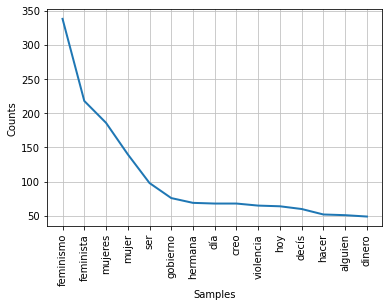

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
nltk.FreqDist(nltk.Text(tokens_tuits)).plot(15)

- Aplicamos el CountVectorizer:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [30]:
count = CountVectorizer()
tex = lista_tuits
bag= count.fit_transform(tex)

- Para saber cuantas veces aparece cada palabra:

In [31]:
palabras=count.vocabulary_
palabras

{'marcha': 1875,
 'policías': 2398,
 'llevaron': 1791,
 'dos': 985,
 'mujeres': 2037,
 'detrás': 901,
 'valla': 3109,
 'cercaba': 470,
 'palacio': 2225,
 'rumor': 2754,
 'muro': 2046,
 'nacional': 2062,
 'bajo': 298,
 'casi': 445,
 'cualquier': 705,
 'métrica': 2053,
 'económica': 1008,
 'peor': 2319,
 'hombres': 1483,
 'ganan': 1337,
 'menos': 1922,
 'mismo': 1979,
 'trabaj': 3032,
 'conoce': 592,
 'detalle': 895,
 'recomendaciones': 2629,
 'casos': 447,
 'concretos': 571,
 'discriminación': 955,
 'violencia': 3185,
 'contr': 617,
 'invitamos': 1643,
 'horas': 1494,
 'canal': 406,
 'acompañen': 42,
 'ver': 3142,
 'entrevista': 1102,
 'inspector': 1600,
 'itz': 1660,
 'marián': 1883,
 'avila': 279,
 'años': 294,
 'valenciana': 3105,
 'gano': 1339,
 'premio': 2443,
 'quincy': 2579,
 'jones': 1677,
 'exceptional': 1190,
 'advocacy': 84,
 'únete': 3260,
 'comunidad': 562,
 'entrando': 1098,
 'internado': 1629,
 'cumbres': 733,
 'crítica': 702,
 'lacra': 1714,
 'siglo': 2852,
 'xxi': 3240,

- Calculamos las palabras que aparecen entre un 10-90%:

In [32]:
lista_palabras=[]
for i in palabras.values():
    lista_palabras.append(i)

In [34]:
import numpy as np
array=np.array(lista_palabras)
array

array([1875, 2398, 1791, ...,  425,  493, 2790])

In [35]:
np.percentile(array, 10)
np.percentile(array, 90)

2947.5

In [36]:
palabras_seleccionadas=list()
for palabra,num in palabras.items():
    if 327<num<2948:
        palabras_seleccionadas.append(palabra)

In [37]:
bag1 = bag.toarray()
print(bag1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


- Calculamos la frecuencia de las palabras:

In [38]:
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
np.set_printoptions(precision=2)#decimales 
print(tfidf.fit_transform(bag).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
tfidf = TfidfTransformer(norm=None)
tfidf = tfidf.fit_transform(bag).toarray()
tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
tfidf.shape

(1518, 3276)

In [41]:
df_frecuencia = pd.DataFrame(tfidf)
df_frecuencia

,0,1,2,3,4,5,6,7,8,9,...,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_frecuencia.columns=palabras

In [46]:
df_frecuencia.head()

,marcha,policías,llevaron,dos,mujeres,detrás,valla,cercaba,palacio,rumor,...,mutilación,genital,detenida,maltratar,menor,edad,precipit,capto,chiste,sarcasmo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_frecuenia_percentil=df_frecuencia.loc[:,palabras_seleccionadas]
df_frecuenia_percentil

,marcha,policías,llevaron,dos,mujeres,detrás,cercaba,palacio,rumor,muro,...,mutilación,genital,detenida,maltratar,menor,edad,precipit,capto,chiste,sarcasmo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Reduccion de dimensionalidad 

In [48]:
X_train=df_frecuencia.copy()

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)


<AxesSubplot:>

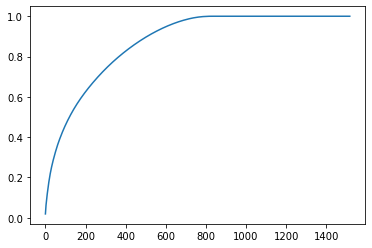

In [50]:
pd.Series(pca.explained_variance_ratio_.cumsum()).plot()

In [51]:
pca = PCA(400)
X_train_pca_final = pca.fit_transform(X_train)

In [53]:
df_PCA=pd.DataFrame(X_train_pca_final, columns=['Comp_'+ str(i) for i in range(1,401)])
df_PCA.head()

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,...,Comp_391,Comp_392,Comp_393,Comp_394,Comp_395,Comp_396,Comp_397,Comp_398,Comp_399,Comp_400
0,1.799380,0.112663,-0.393342,-0.186689,0.021002,0.728120,-0.098570,-0.121203,-0.746824,0.013136,...,-1.626363,0.619837,0.597104,-0.813408,0.122195,-0.073440,0.077093,-0.470324,-0.581046,0.243998
1,0.545813,-0.165050,-0.616212,-0.285170,0.031362,0.930237,-0.168496,-0.384455,-0.906785,-0.115424,...,-0.997828,0.424519,0.010668,-0.152309,0.394760,0.329426,0.055326,-0.329782,-0.574096,0.049833
2,0.451217,-0.195935,-0.604745,-0.354588,-0.042701,0.696683,-0.142641,-0.079527,-0.759304,-0.187021,...,0.096519,0.095767,-0.332472,0.316251,0.949912,-0.394832,0.158915,-1.486890,0.279707,0.317339
3,-0.227872,-0.259808,-0.669776,-0.267917,0.005942,1.361215,-0.044527,0.568414,-0.714929,0.360922,...,-1.077797,-0.418582,-0.271637,0.250603,0.301834,-0.483418,-0.448029,-0.954799,0.041210,0.208424
4,-0.297334,-0.289122,-0.557094,-0.312620,-0.192895,-0.652755,-0.067298,-0.060860,0.019418,-0.004340,...,0.159313,1.816659,-1.126235,-1.553812,-0.761791,0.652526,0.681979,-1.783536,-1.225545,0.493257


> ### <font color= "purple" >**APRENDIZAJE NO SUPERVISADO**</font><font color= "purple" >_CLUSTERING</font>

##### <font color= "purple" > **HIERALCHICAL MODEL**</font>

- Utilizamos este modelo ya que de los modelos no supervisados es con el que mejor resultado obtuvimos,el parametro que elegimos después de varias pruebas fue el metodo **ward** 

In [ ]:
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import ClusterWarning
from scipy.spatial import distance_matrix 
from warnings import simplefilter

In [ ]:
X= dfh.values

In [ ]:
dist_matrix = distance_matrix(X,X) 
print(dist_matrix, dist_matrix.shape)

In [ ]:
simplefilter("ignore", ClusterWarning)
Z = hierarchy.linkage(dist_matrix, 'ward')

In [ ]:
plt.figure(figsize=(10,150))
dendro = hierarchy.dendrogram(Z,orientation='left')# genero el demdograma
plt.tick_params(axis='x', labelsize=8)

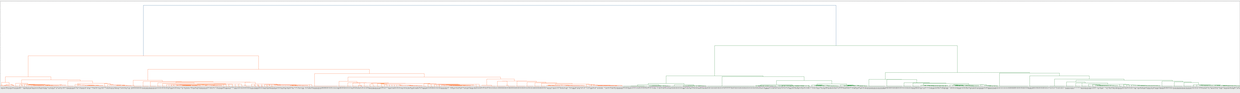

In [ ]:
from scipy.cluster.hierarchy import leaves_list,fcluster
np.where(leaves_list(Z)==1438)

In [ ]:
indices1 = leaves_list(Z)[:761]
indices2 = leaves_list(Z)[761:]

##### <font color= "purple" > **WORD CLOUD CLASES HIERALCHICAL**</font>

In [10]:
df2=pd.read_excel('DATAFRAME_COMPLETO.xlsx')
df2.head()

,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism
0,173,#8M2021,2021-03-14 11:50:59,1371066323913039872,PuriCaraballo,vídeo seminario cautivos del cine nº maestras...,1,3,1,0,NaN
1,1095,feminismo,2021-03-21 08:13:13,1373548234707197952,Ana265857460,yolanda díaz irene montero ione belarra jéssi...,1,3,1,0,NaN
2,1180,feminismo,2021-03-21 07:59:29,1373544781222187008,GermanCostoya,hoxe rendemos homenaxe a nosa querida compañe...,1,3,1,0,NaN
3,1235,feminista,2021-03-22 20:08:28,1374090622580239872,dianaprieto69,se cumple año y medio del caso castro urdiale...,1,3,1,0,0.0
4,749,feminismo,2021-03-22 20:20:14,1374093585725992960,ElnaAdvocades,un grupo musical trebol clan por ejemplo cant...,1,3,1,0,NaN


In [60]:
clase_0=df2[df2['claseJerarquico']==0][['query','tweet_text']]
clase_0['query'].value_counts()

feminismo                    266
feminista                    172
#ChicasVox52                  83
#8M                           78
#LaViolenciaNoTieneGenero     65
#feminazisterroristas         39
#NoHablesEnMiNombre           27
#8M2021                       22
#HuelgaFeminista               5
#FeminismIsCancer              4
Name: query, dtype: int64

In [62]:
clase_1=df2[df2['claseJerarquico']==1][['query','tweet_text']]
clase_1['query'].value_counts()

feminismo                    216
feminista                    128
#feminazisterroristas        111
#LaViolenciaNoTieneGenero     85
#8M                           72
#ChicasVox52                  66
#NoHablesEnMiNombre           43
#8M2021                       21
#FeminismIsCancer             10
#HuelgaFeminista               5
Name: query, dtype: int64

In [63]:
listaleer1=list()
for i in clase_1.tweet_text:
    listaleer1.append(i)

In [68]:
clases_estudiar = df2.groupby('claseJerarquico')['tweet_text'].sum()
clases_estudiar

claseJerarquico
0     vídeo seminario cautivos del cine nº maestras...
1    muere nawal al saadawi pensadora feminista egi...
Name: tweet_text, dtype: object

In [71]:
import pickle
lista = pickle.load(open('palabras_seleccionadas.p','rb'))

In [72]:
wordclase0=[i for i in nltk.word_tokenize(clases_estudiar[0]) if i in lista]

In [73]:
wordclase1=[i for i in nltk.word_tokenize(clases_estudiar[1]) if i in lista]

In [75]:
from wordcloud import WordCloud
nube0=WordCloud(background_color='white', max_words=len(wordclase0))
nube0.generate(' '.join(wordclase0))
nube1=WordCloud(background_color='white', max_words=len(wordclase1))
nube1.generate(' '.join(wordclase1))

In [76]:
import matplotlib.pyplot as plt

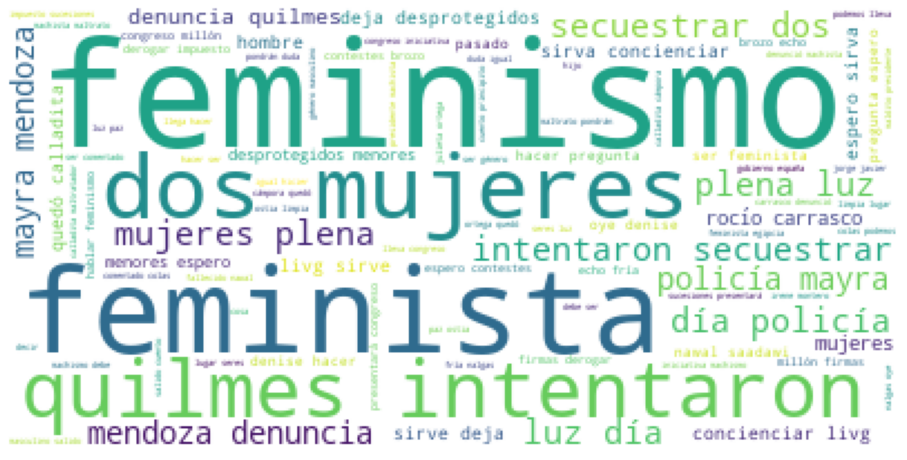

In [77]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(nube0)
ax.axis('off')
plt.show()

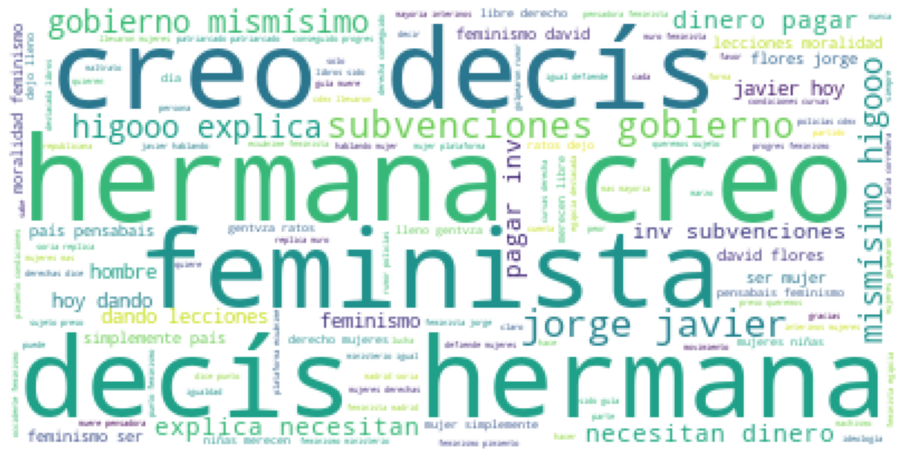

In [78]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(nube1)
ax.axis('off')
plt.show()

### <font color= "purple" >**CONCLUSIONES WORDCLOUD DE APRENDIZAJE NO SUPERVISADO:**</font><font color= "purple" > </font>

El modelo elegido **HIERARQUICAL** realizó dos cluters en base a la muestra inicial de 1518 tweets. Este modelo ofrecía una ventaja respecto al **KMEANS** que dividía la muestra en más clusters que no ofrecían discriminación alguna.

La visualización de resultados del **HIERARQUICAL** realizada a través de Word Cloud no arroja descriminación entre un cluster y otro. Las palabras feminismo y feminista aparecen con una frecuencia elevada en ambos.

También podemos observar que existe mucho ruido en la muestra generado por la presencia de nombre propios en los tweets, lo cual no aporta información pero si se plantean como palabras relevantes y, por lo tanto, frecuentes. En lo que se refiere a estas palabras el cluster los introduce en el segundo.

### <font color= "purple" >**SIGUIENTES PASOS A SEGUIR TRAS LOS RESULTADOS OBTENIDOS EN EL APRENDIZAJE NO SUPERVISADO:**</font><font color= "purple" > </font>

> ### <font color= "purple" >**ANALISIS EXPLORATORIO**</font><font color= "purple" > CLASES_0 Y 1</font>

### <font color= "purple" >**EDA**</font><font color= "purple" > </font>

In [13]:
df_feminism=df2.loc[~df2['feminism'].isna(),:]
df_feminism.head()

,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism
3,1235,feminista,2021-03-22 20:08:28,1374090622580239872,dianaprieto69,se cumple año y medio del caso castro urdiale...,1,3,1,0,0.0
6,478,#feminazisterroristas,2021-03-19 14:31:44,1372918717311516928,PerezzMarlene,huuuuuuuy la ídola de las toda una cabrona chi...,0,3,1,0,0.0
13,1332,feminista,2021-03-22 20:04:05,1374089519599848960,Isabel_P_Martin,manual chic puede llegar sola y borracha a cas...,1,3,1,0,0.0
14,784,feminismo,2021-03-22 20:18:43,1374093201313779968,Gladiss10,abrazo el feminismo aunque me duela a veces me...,0,3,1,0,1.0
23,895,feminismo,2021-03-22 20:13:03,1374091776101907968,fdzlurdes,se m sale el feminismo del cuerpo cdo veo el ...,1,4,1,0,0.0


- TRATAMOS DE SACAR LOS RETWEET Y FAVORITOS DE LOS TWEETS, PERO NO ES POSIBLE PUESTO QUE SOLO PODEMOS ACCEDER A ESTA INFORMACIÓN DE 37 TWEETS DE LOS 417 CON LOS QUE TRABAJAMOS:

In [230]:
import tweepy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
consumer_key = 'GeKN72VigqKt20oKKE2WTIw1a'
consumer_secret = '6DqxCOBe9CDQgghRTA1lezQh18UABCZT0e2pSmNzvt6fcbYm1W'
access_token  = '1356514750532898816-LDvoph6XLp4MEkh78IQqhPAi5JPrpj'
access_token_secret = '3IulM0VJ2K6cVsfawaclRhez95ldHVZlkzXz2h6BtmuhG'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [231]:
listaids = df_feminism['id'].unique()

In [252]:
len(listaids)

417

In [234]:
def lookup_tweets(tweet_IDs, api):
    full_tweets = []
    tweet_count = len(tweet_IDs)
    try:
        for i in range((tweet_count // 100) + 1):
            # Catch the last group if it is less than 100 tweets
            end_loc = min((i + 1) * 100, tweet_count)
            full_tweets.extend(
                api.statuses_lookup(id_=tweet_IDs[i * 100:end_loc])
            )
        return full_tweets
    except tweepy.TweepError:
        print ('Something went wrong, quitting...')


In [241]:
tweets = lookup_tweets(listaids.tolist(), api)

In [246]:
tuits_feminism = [[tuit.id, tuit.retweet_count,tuit.favorite_count] for tuit in tweets]
dfinfo = pd.DataFrame(tuits_feminism, columns = ["id","retweet","fav"])
dfinfo.head()

,id,retweet,fav
0,1373547740253274112,21,0
1,1374090034530385920,5,0
2,1372046315375443968,12,0
3,1373780220927488000,6,13
4,1373545009845243904,0,1


In [253]:
dfinfo

,id,retweet,fav
0,1373547740253274112,21,0
1,1374090034530385920,5,0
2,1372046315375443968,12,0
3,1373780220927488000,6,13
4,1373545009845243904,0,1
5,1372038564041605120,14,0
6,1374090044605095936,0,1
7,1372025936724561920,3,0
8,1372718938417623040,373,0
9,1372047791711784960,51,0


In [248]:
df_feminism = pd.merge(df_feminism,dfinfo, on="id")

In [249]:
df_feminism.shape

(37, 19)

### <font color= "purple" >**En la siguiente gráfica mostramos la frecuencia de las query (basadas en palabras claves y hashtags) presentes en la muestra:**</font><font color= "purple" > </font>

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='query'>

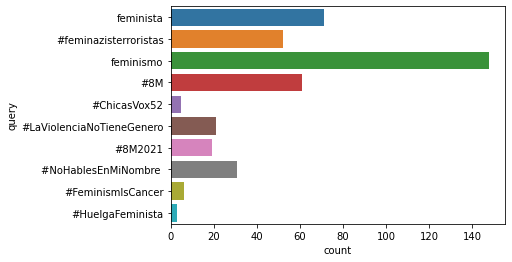

In [137]:
sns.countplot(y=df_feminism['query'])

CONCLUSIONES: la mayor frecuencia de aparición de las query dentro de nuestros tweets son feminismo seguido #8M con una frecuencia de aparición considerablemente mayor al resto. Con lo que podemos concluir que la mayoría de los tweets con los que hemos realizado la clasificación contenían la palabra feminismo.

- Obtenemos por separado el año, mes, dia y hora de nustros tweets:

In [194]:
from datetime import datetime
lista_fechas=list()
for i in df_feminism['date']:
    lista_fechas.append(datetime.strptime(i, "%Y-%m-%d %H:%M:%S"))

In [195]:
df_feminism.loc[:,'date']=lista_fechas

In [196]:
df_feminism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            417 non-null    int64         
 1   ind_cruce        417 non-null    int64         
 2   query            417 non-null    object        
 3   date             417 non-null    datetime64[ns]
 4   id               417 non-null    int64         
 5   user             417 non-null    object        
 6   tweet_text       417 non-null    object        
 7   Nº Menciones     417 non-null    int64         
 8   clasekmeans1     417 non-null    int64         
 9   clasekmeans2     417 non-null    int64         
 10  claseJerarquico  417 non-null    int64         
 11  feminism         417 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 39.2+ KB


In [197]:
semana = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}
df_feminism['year']=df_feminism.date.apply(lambda x: x.year)
df_feminism['month']=df_feminism.date.apply(lambda x: x.month)
df_feminism['weekday']=df_feminism.date.apply(lambda x: semana[x.weekday()])
df_feminism['hour']=df_feminism.date.apply(lambda x: x.hour)

In [198]:
df_feminism.head()

,index,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism,year,month,weekday,hour
0,3,1235,feminista,2021-03-22 20:08:28,1374090622580239872,dianaprieto69,se cumple año y medio del caso castro urdiale...,1,3,1,0,0.0,2021,3,Lunes,20
1,6,478,#feminazisterroristas,2021-03-19 14:31:44,1372918717311516928,PerezzMarlene,huuuuuuuy la ídola de las toda una cabrona chi...,0,3,1,0,0.0,2021,3,Viernes,14
2,13,1332,feminista,2021-03-22 20:04:05,1374089519599848960,Isabel_P_Martin,manual chic puede llegar sola y borracha a cas...,1,3,1,0,0.0,2021,3,Lunes,20
3,14,784,feminismo,2021-03-22 20:18:43,1374093201313779968,Gladiss10,abrazo el feminismo aunque me duela a veces me...,0,3,1,0,1.0,2021,3,Lunes,20
4,23,895,feminismo,2021-03-22 20:13:03,1374091776101907968,fdzlurdes,se m sale el feminismo del cuerpo cdo veo el ...,1,4,1,0,0.0,2021,3,Lunes,20


In [203]:
df_feminism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            417 non-null    int64         
 1   ind_cruce        417 non-null    int64         
 2   query            417 non-null    object        
 3   date             417 non-null    datetime64[ns]
 4   id               417 non-null    int64         
 5   user             417 non-null    object        
 6   tweet_text       417 non-null    object        
 7   Nº Menciones     417 non-null    int64         
 8   clasekmeans1     417 non-null    int64         
 9   clasekmeans2     417 non-null    int64         
 10  claseJerarquico  417 non-null    int64         
 11  feminism         417 non-null    float64       
 12  year             417 non-null    int64         
 13  month            417 non-null    int64         
 14  weekday          417 non-null    object   

### <font color= "purple" >**Gráfica que muestra la cantidad de tweets por días:**</font><font color= "purple" > </font>

In [14]:
df_feminism["fecha"] = df_feminism["date"].map(lambda x:str(x)[:10])

<ipython-input-14-91c244be1f6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feminism["fecha"] = df_feminism["date"].map(lambda x:str(x)[:10])


In [15]:
fechas_ordenadas = df_feminism.groupby("fecha").size().sort_index(ascending=True)
fechas_ordenadas

fecha
2021-03-14     19
2021-03-15      4
2021-03-16     21
2021-03-17     73
2021-03-18     16
2021-03-19      8
2021-03-20     11
2021-03-21     97
2021-03-22    168
dtype: int64

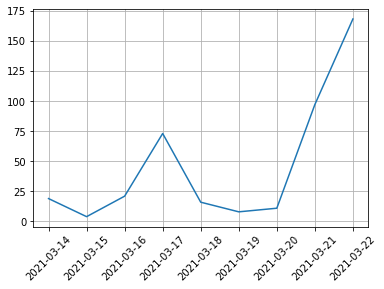

In [148]:
fig,ax = plt.subplots()
plt.plot(fechas_ordenadas)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

CONCLUSIONES: como se puede observar en la gráfica, dentro de nuestra muestra, una gran cantidad de tweets fueron publicados el día 22 de Marzo. Razones:
- No sabiamos de la existencia del parámetro que permite extraer los tweets de una determinada fecha.
- Al no hacer uso del mismo, la API por defecto te devuelve los tweets de los últimos 6 días.

### <font color= "purple" >**Gráfica que muestra los tweets por días:**</font><font color= "purple" > </font>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

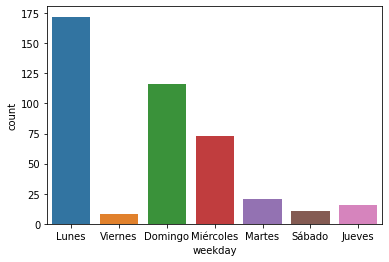

In [93]:
sns.countplot(df_feminism['weekday'])

La mayoría de los tweets de nuestra muestra fueron publicados el Lunes.

### <font color= "purple" >**Gráfica que muestra las horas a las que fueron publicados os tweets:**</font><font color= "purple" > </font>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

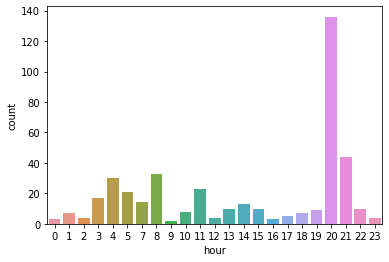

In [94]:
sns.countplot(df_feminism['hour'])

Una muestra  significativa de nuestros tweets fueron publicados a las 20:00 y 21:00 horas.

### <font color= "purple" >**FRECUENCIA DE PALABRAS POR CADA UNA DE LAS CLASES:**</font><font color= "purple" > </font>

> ### <font color= "purple" >**Frecuencia de las palabras de la clase 0:**</font><font color= "purple" > </font>

In [95]:
clase_0=df_feminism[df_feminism['feminism']==0]

In [96]:
tuits_clase0=clase_0['tweet_text'].tolist()

In [97]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return nltk.word_tokenize(text,"spanish")
def tokenizer_porter(text):
    return [porter.stem(word) for word in tokenizer(text)]

In [98]:
lista_tuits_clase0=[]
stop = nltk.corpus.stopwords.words("spanish")
for i in tuits_clase0:
    x=[w for w in tokenizer(i) if w not in stop]
    x=[x for x in x if len(x)>3]
    x=' '.join(x)
    lista_tuits_clase0.append(x)

In [99]:
tokens_tuits_clase0=[]
for i in lista_tuits_clase0:
    tokens_tuits_clase0.extend(tokenizer(i))

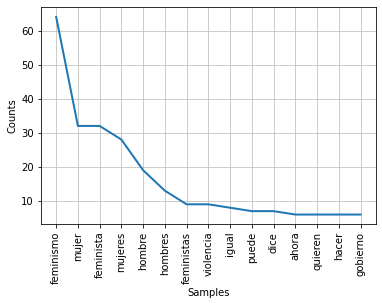

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [100]:
nltk.FreqDist(nltk.Text(tokens_tuits_clase0)).plot(15)

> ### <font color= "purple" >**Word Cloud de las palabras de la clase 0:**</font><font color= "purple" > </font>

In [101]:
import pickle
pickle.dump(tokens_tuits_clase0, open('tokens_tuits_clase0.p', 'wb'))

In [102]:
nube_clase0=WordCloud( max_words=len(tokens_tuits_clase0), colormap="Dark2")
nube_clase0.generate(' '.join(tokens_tuits_clase0))

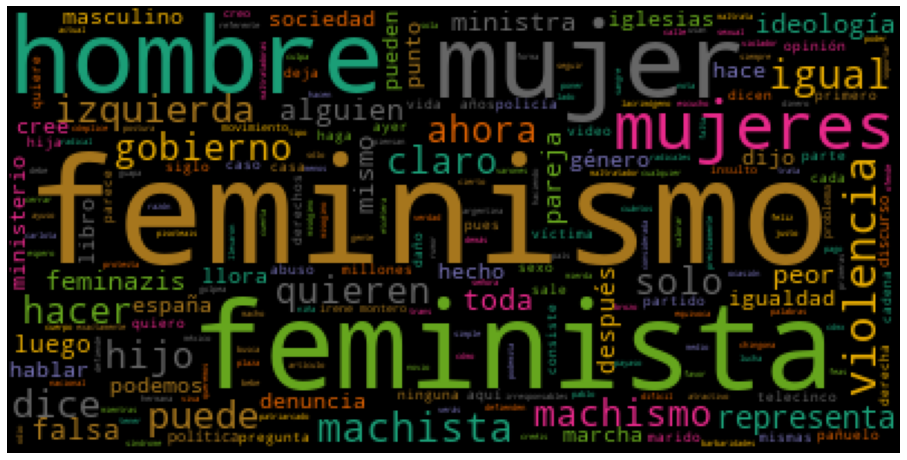

In [103]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(nube_clase0)
ax.axis('off')
plt.show()

> ### <font color= "purple" >**Frecuencia de las palabras de la clase 1:**</font><font color= "purple" > </font>

In [104]:
clase_1=df_feminism[df_feminism['feminism']==1]

In [105]:
tuits_clase1=clase_1['tweet_text'].tolist()

In [106]:
lista_tuits_clase1=[]
stop = nltk.corpus.stopwords.words("spanish")
for i in tuits_clase1:
    x=[w for w in tokenizer(i) if w not in stop]
    x=[x for x in x if len(x)>3]
    x=' '.join(x)
    lista_tuits_clase1.append(x)

In [107]:
tokens_tuits_clase1=[]
for i in lista_tuits_clase1:
    tokens_tuits_clase1.extend(tokenizer(i))

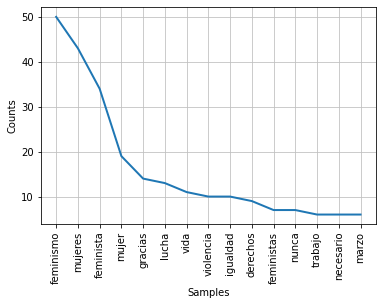

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [108]:
nltk.FreqDist(nltk.Text(tokens_tuits_clase1)).plot(15)

> ### <font color= "purple" >**Word Cloud de las palabras de la clase 1:**</font><font color= "purple" > </font>

In [109]:
pickle.dump(tokens_tuits_clase1, open('tokens_tuits_clase1.p', 'wb'))

In [110]:
nube_clase1=WordCloud( max_words=len(tokens_tuits_clase1), colormap="Dark2")
nube_clase1.generate(' '.join(tokens_tuits_clase1))

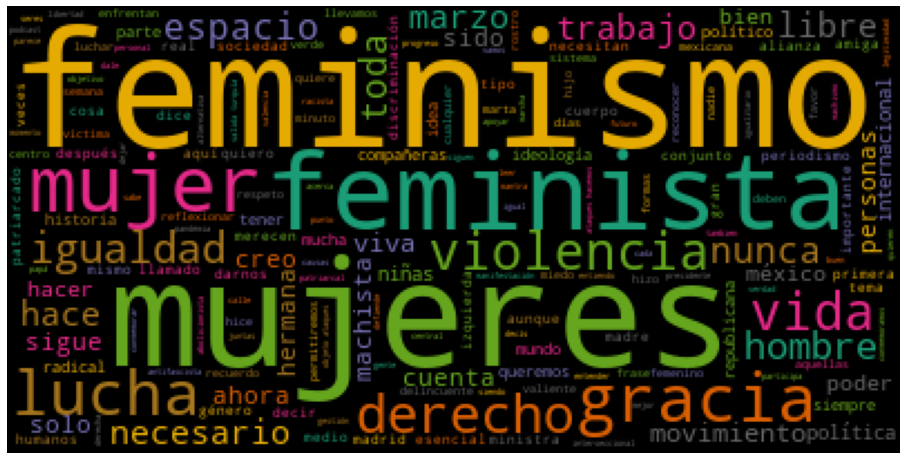

In [111]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(nube_clase1)
ax.axis('off')
plt.show()

### <font color= "purple" >**CONCLUSIONES de la frecuencia de palabras y de los Word Cloud:**</font><font color= "purple" > </font>

Observamos que en ambas clases las palabras más frecuentes son feminismo, mujer y feminista. Sin embargo, vemos como en nuestra clase 1 (clasificada como a favor del movimiento feminista) aparecen palabras como **lucha, vida, igualdad y derechos**. Esto nos lleva a concluir que cuando se habla en favor al movimiento estas son las palabras que se utilizan para poder descriminar entre una y otra clase.

### <font color= "purple" >**Creamos sets para estudiar las palabras presentes en ambas clases y cuales son las que nos llevaría a discriminar entre una y otra:**</font><font color= "purple" > </font>

In [112]:
set_clase0=set(tokens_tuits_clase0)

In [113]:
set_clase1=set(tokens_tuits_clase1)

> ### <font color= "purple" >**Word Cloud de las palabras comunes:**</font><font color= "purple" > </font>


In [173]:
interseccion=set_clase0.intersection(set_clase1)
len(interseccion)

230

In [169]:
pickle.dump(interseccion, open('interseccion.p', 'wb'))

In [170]:
nube_interseccion=WordCloud( max_words=len(interseccion), colormap="Dark2")
nube_interseccion.generate(' '.join(interseccion))

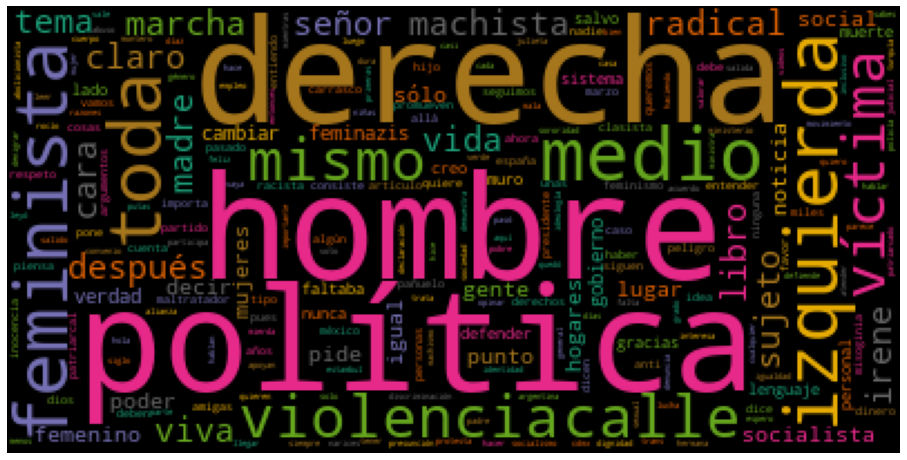

In [171]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(nube_interseccion)
ax.axis('off')
plt.show()

### <font color= "purple" >**CONCLUSIONES para la intersección:**</font><font color= "purple" > </font>

Como podemos ver las palabras comunes a ambas clases son **hombre, política y derecha** así como **violencia**, se mantienen en común en las dos clases. Con lo que podemos concluir que normalmente los tweets que versan sobre el movimiento feminista están muy influenciados por la política.

> ### <font color= "purple" >**Word Cloud de las palabras discriminatorias de la clase 0:**</font><font color= "purple" > </font>

In [184]:
set_clase0_=set_clase0-set_clase1

In [185]:
pickle.dump(set_clase0_, open('set_clase0_.p', 'wb'))

In [186]:
nube_clase0_=WordCloud( max_words=len(set_clase0_), colormap="Dark2")
nube_clase0_.generate(' '.join(set_clase0_))

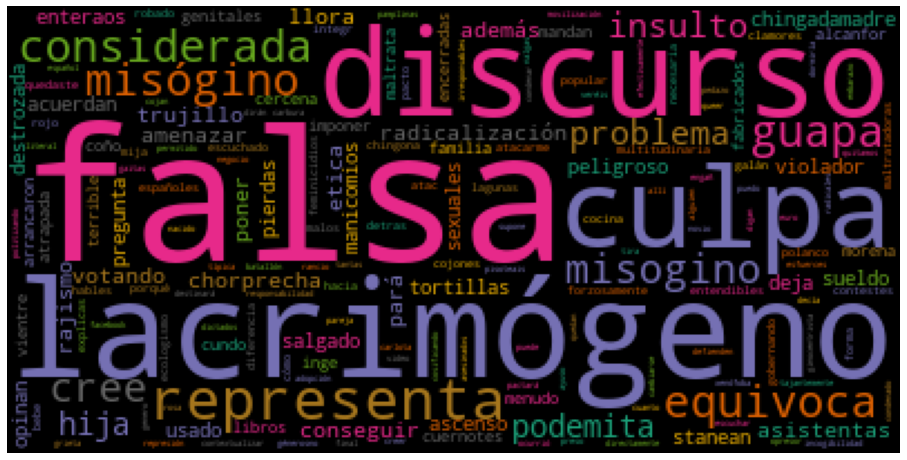

In [187]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(nube_clase0_)
ax.axis('off')
plt.show()

### <font color= "purple" >**CONCLUSIONES para las palabras de las clase 0:**</font><font color= "purple" > </font>

Como vemos las palabras presentes en la clase 0 suelen ser palabras con connotaciones negativas, **insulto, falsa, lacrimógeno, misógino**, son algunas de las más representativas. Con lo cual nuestra clase 0, a pesar de haber sido una clasificación manual, si que se mantiene constante los rasgos intrínsecos de los tweets con características negativas.

> ### <font color= "purple" >**Word Cloud de las palabras discriminatorias de la clase 1:**</font><font color= "purple" > </font>

In [188]:
set_clase1_=set_clase1-set_clase0

In [189]:
pickle.dump(set_clase1_, open('set_clase1_.p', 'wb'))

In [190]:
nube_clase1_=WordCloud( max_words=len(set_clase1_), colormap="Dark2")
nube_clase1_.generate(' '.join(set_clase1_))

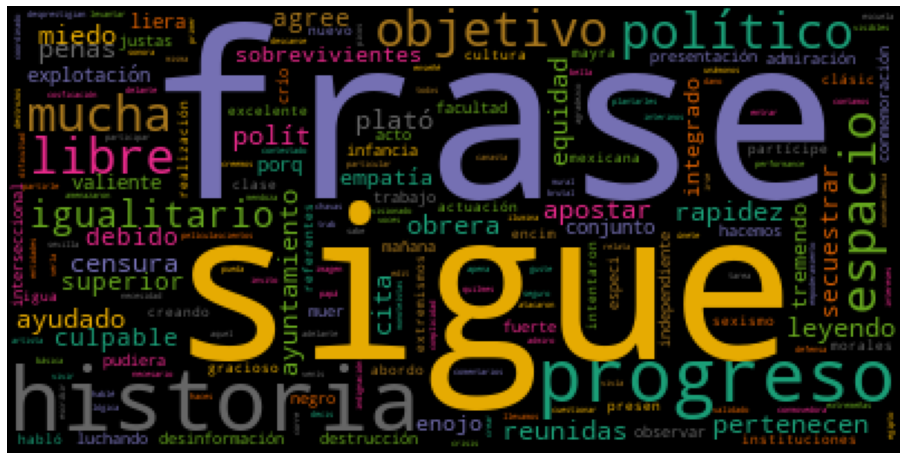

In [191]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(nube_clase1_)
ax.axis('off')
plt.show()

### <font color= "purple" >**CONCLUSIONES de las palabras de la clase 1:**</font><font color= "purple" > </font>

De manera contraria las palabras que solo aparecen en la clase 1 y por tanto sirven para discriminar esta clase son palabras relacionadas con el progreso, **espacio, libre, igualitario, sigue, reunidas**. Lo que nos sirve para poder sacar conclusiones acerca de tweets que claramente estarían a favor del movimiento feminista.

### <font color= "purple" >**APRENDIZAJE SUPERVISADO**</font><font color= "purple" > CLASIFICACIÓN</font>

- En este caso optamos por reducir nuestro dataset , despues de varias pruebas y comprobar que la reducción de componentes PCA no aportaba resultados satisfactorios , optamos por acotar la muestra de datos. Finalmente nos quedamos unicamente con aquellos tweets unicos ( sin contar con los retuits ). 

- El siguiente Dataset los componen **417** de los 1518 con los que iniciamos el estudio. Además etiquetamos manualmente los tuits en dos clases diferenciadas : 
    - **Clase_0**= Tuits con contenido que se posicionaba en **contra** del movimiento y que por tanto no apoyaban la marcha del 8M
    - **Clase_1** = Tuits en el que el contenido de una manera clara se posicionaba **a favor** del movimiento y por tanto apoyaba la huelga del 8M
 

- Eliminamos aquellos tuits con contenido **neutro** o que no entraban dentro de la polaridad establecida ( a favor o en contra ) 

In [74]:
df3=pd.read_csv('componentes_sinPCA.csv')
df3.head()

,cumple,medio,caso,castro,mujer,mató,marido,hirvió,repartió,croquetas,...,gracioso,retorcido,invito,sumarse,resistiendo,neoliberalismo,denuncian,destrozos,reflexión,excelente
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.307029,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.263417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


- El siguiente Dataset contiene la **columna 'feminism'** que contiene el etiquetado de las **clases 0 y 1**

In [75]:
df_feminism=df2.loc[~df2['feminism'].isna(),:]
df_feminism=df_feminism.reset_index()
df_feminism.head()

,index,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism
0,3,1235,feminista,2021-03-22 20:08:28,1374090622580239872,dianaprieto69,se cumple año y medio del caso castro urdiale...,1,3,1,0,0.0
1,6,478,#feminazisterroristas,2021-03-19 14:31:44,1372918717311516928,PerezzMarlene,huuuuuuuy la ídola de las toda una cabrona chi...,0,3,1,0,0.0
2,13,1332,feminista,2021-03-22 20:04:05,1374089519599848960,Isabel_P_Martin,manual chic puede llegar sola y borracha a cas...,1,3,1,0,0.0
3,14,784,feminismo,2021-03-22 20:18:43,1374093201313779968,Gladiss10,abrazo el feminismo aunque me duela a veces me...,0,3,1,0,1.0
4,23,895,feminismo,2021-03-22 20:13:03,1374091776101907968,fdzlurdes,se m sale el feminismo del cuerpo cdo veo el ...,1,4,1,0,0.0


- Comprobamos que las clases esten **balanceadas**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feminism', ylabel='count'>

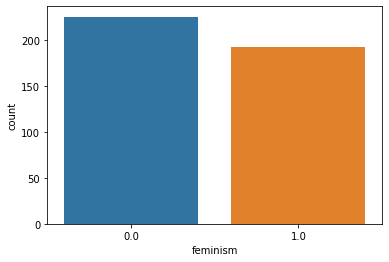

In [76]:
sns.countplot(df_feminism['feminism'])

In [77]:
clases=pd.DataFrame(df_feminism['feminism'].reset_index(drop=True))
clases

,feminism
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
412,1.0
413,1.0
414,1.0
415,1.0


In [78]:
df_clasificacion=pd.concat([df3,clases], axis=1)
df_clasificacion

,cumple,medio,caso,castro,mujer,mató,marido,hirvió,repartió,croquetas,...,retorcido,invito,sumarse,resistiendo,neoliberalismo,denuncian,destrozos,reflexión,excelente,feminism
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.307029,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.263417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
413,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
414,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
415,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0


### <font color= "purple" >**MÁQUINA DE SOPORTE VECTORIAL:**</font><font color= "purple" > </font>

In [95]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [177]:
X = df_clasificacion.drop('feminism', axis=1)
y = df_clasificacion['feminism']

In [101]:
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, y_train)

SVC(gamma='auto')

In [102]:
yhat_svm = clf_svm.predict(X_test)
accuracy_score(y_test,yhat_svm)

0.5238095238095238

In [103]:
print(classification_report(y_test, yhat_svm, digits=3)) 

              precision    recall  f1-score   support

         0.0      0.524     1.000     0.688        44
         1.0      0.000     0.000     0.000        40

    accuracy                          0.524        84
   macro avg      0.262     0.500     0.344        84
weighted avg      0.274     0.524     0.360        84



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> ### <font color= "purple" >**Método de validación Hold Out:**</font><font color= "purple" > </font>

In [182]:
media_svm=[]
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf_svmH = SVC(gamma='auto')

    clf_svmH = clf_svmH.fit(X_train, y_train)
    yhat_H = clf_svmH.predict(X_test)
    accuracy_score(y_test,yhat_H)
    clf_svm.fit(X_train,y_train)
    media_svm.append(clf_svmH.score(X_test,y_test))

In [184]:
X_test.shape

(84, 1486)

In [183]:
np.mean(media_svm)

0.5351190476190476

In [166]:
np.std(media_svm)

0.04841653640784755

### <font color= "purple" >**NAIVE BAYES:**</font><font color= "purple" > </font>

In [106]:
gnb = GaussianNB(var_smoothing=1e-09)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.6071428571428571


In [107]:
print(classification_report(y_pred, y_test, digits=3)) 

              precision    recall  f1-score   support

         0.0      0.477     0.677     0.560        31
         1.0      0.750     0.566     0.645        53

    accuracy                          0.607        84
   macro avg      0.614     0.622     0.603        84
weighted avg      0.649     0.607     0.614        84



> ### <font color= "purple" >**Método de validación Hold Out:**</font><font color= "purple" > </font>

In [157]:
media_G=[]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    gnb_H = GaussianNB(var_smoothing=1e-09)
    
    gnb_H.fit(X_train, y_train)
    yhat_H = gnb_H.predict(X_test)
    accuracy_score(y_test,yhat_H)
    gnb_H.fit(X_train,y_train)
    media_G.append(gnb_H.score(X_test,y_test)) #accuracy

In [161]:
np.mean(media_G)

0.5904285714285714

In [162]:
np.std(media_G)

0.04716267019918889

In [ ]:
modelo_final

In [169]:
print(classification_report(yhat_H, y_test, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     0.583     0.737        84
         1.0      0.000     0.000     0.000         0

    accuracy                          0.583        84
   macro avg      0.500     0.292     0.368        84
weighted avg      1.000     0.583     0.737        84



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
confusion_matrix(yhat_H,y_test)

array([[21,  6],
       [25, 32]])

In [153]:
yhat_H

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.])

### <font color= "purple" >**RANDOM FOREST**</font><font color= "purple" >_Hold Out:</font>

> ### <font color= "purple" >**Importamos el modelo con mejores resultados:**</font><font color= "purple" ></font>

In [171]:
import pickle
with open("modelo_final.pkl", 'rb') as file:
    clf = pickle.load(file)

In [186]:
yhat_RF=clf.predict(X_test)
yhat_RF

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.])

In [283]:
confusion_matrix(yhat_RF,y_test)

array([[44,  6],
       [ 1, 33]])

### <font color= "purple" >**Tabla con los resultados de todos los modelos:**</font><font color= "purple" ></font>

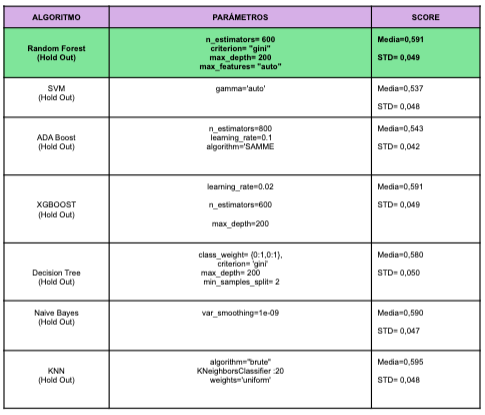

### <font color= "purple" >**Creamos un Dataframe con X_test, test e yhat:**</font><font color= "purple" ></font>

In [188]:
X_test['test']=y_test

<ipython-input-188-8ab7ed018f2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['test']=y_test


In [189]:
X_test['predict']=yhat_RF

<ipython-input-189-e63868fcefd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predict']=yhat_RF


In [190]:
X_test

,cumple,medio,caso,castro,mujer,mató,marido,hirvió,repartió,croquetas,...,invito,sumarse,resistiendo,neoliberalismo,denuncian,destrozos,reflexión,excelente,test,predict
195,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
116,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
311,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
90,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.0,0.0,0.0,0.0,0.0,0.263417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
173,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
276,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
346,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color= "purple" >**Tweets mal clasificados:**</font><font color= "purple" ></font>

In [205]:
X_test[(X_test['test']==1)&(X_test['predict']==0)]

,cumple,medio,caso,castro,mujer,mató,marido,hirvió,repartió,croquetas,...,invito,sumarse,resistiendo,neoliberalismo,denuncian,destrozos,reflexión,excelente,test,predict
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.322043,0.0,1.0,0.0


In [206]:
X_test[(X_test['test']==0)&(X_test['predict']==1)]

,cumple,medio,caso,castro,mujer,mató,marido,hirvió,repartió,croquetas,...,invito,sumarse,resistiendo,neoliberalismo,denuncian,destrozos,reflexión,excelente,test,predict
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### <font color= "purple" >**Para revisar los textos de los tweets mal clasificados**</font><font color= "purple" >_Son de la clase 1 y los clasifica como 0</font>

In [231]:
df_feminism[df_feminism.index==90]
1374092312721117196

,index,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism
90,365,855,feminismo,2021-03-22 20:15:11,1374092312721116928,carmenmoranb,el feminismo sigue su avance méxico acoge un f...,0,3,1,0,1.0


In [232]:
df_feminism[df_feminism.index==366]

,index,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism
366,1395,929,feminismo,2021-03-22 20:11:16,1374091325872700928,JorgeMujicaMX,nuestra comisionada presidenta participa maña...,2,3,1,1,1.0


In [239]:
df_feminism[df_feminism.index==314]

,index,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism
314,1177,170,#8M2021,2021-03-14 11:55:11,1371067379980103936,ECarregado,arquitectas y extremeñas os presentamos a las...,1,3,1,1,1.0


In [251]:
df_feminism[df_feminism.index==156]

,index,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism
156,668,54,#8M,2021-03-17 04:58:34,1372049699176390912,DesignaJalisco,el pudiera parecer solo un día para la clase ...,1,3,1,0,1.0


In [252]:
df_feminism[df_feminism.index==415]

,index,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism
415,1516,458,#feminazisterroristas,2021-03-20 16:16:22,1373307437214806016,tapia_olimpia,el de marzo día de hacer destrozos via para la...,1,3,1,1,1.0


In [253]:
df_feminism[df_feminism.index==36]

,index,ind_cruce,query,date,id,user,tweet_text,Nº Menciones,clasekmeans1,clasekmeans2,claseJerarquico,feminism
36,119,62,#8M,2021-03-17 04:49:20,1372047376072933120,Gonzalo40417673,únete a la charla del con la primera mujer di...,2,3,1,0,1.0


### <font color= "purple" >**Accedemos al tweet completo (sin limpiar):**</font><font color= "purple" ></font>

In [290]:
df

,query,date,id,user,tweet_text
0,#8M,2021-03-22 01:56:00,1373815693305520129,Excelsior,#LoMásVisto | Durante la marcha del #8M policí...
1,#8M,2021-03-17 05:53:35,1372063546801070083,CiroGomezL,"No fue rumor, los policías de la #CDMX sí se l..."
2,#8M,2021-03-21 23:35:02,1373780220927488000,ceeymx,"Bajo casi cualquier métrica económica, las muj..."
3,#8M,2021-03-22 11:07:08,1373954391779143681,edimas1,RT @CIDH: #8M #DíaDeLaMujer \n\nConoce en deta...
4,#8M,2021-03-22 11:06:33,1373954244383023104,carlosmon98,RT @SinLinea_Mx: 👉Les invitamos a las 22:00 ho...
...,...,...,...,...,...
1513,feminista,2021-03-21 21:50:27,1373753898087940097,guilleserna,RT @dearguelleslugo: Ha fallecido la pensadora...
1514,feminista,2021-03-21 21:50:25,1373753892698271747,ElCheQueVaraJr,@SoniaVivasRive3 Ayer una mujer era detenida p...
1515,feminista,2021-03-21 21:50:19,1373753868073500688,ReisboyPhD,@pobrecabra no capto si es un chiste feminista...
1516,feminista,2021-03-21 21:50:10,1373753829636907011,_Duruse,RT @brujasdelmar: El día de hoy ha fallecido N...


In [291]:
texto1=df[df["date"]=="2021-03-22 20:15:11"].iloc[:,4:]

In [293]:
for i in texto1['tweet_text']:
    print(i)

El feminismo sigue su avance. México acoge un foro internacional de igualdad para acelerar los compromisos adquirid… https://t.co/5hKVyYmbJ9


In [272]:
texto2=df[df["date"]=="2021-03-22 20:11:16"].iloc[:,4:]

In [273]:
for i in texto2['tweet_text']:
    print(i)

RT @Infoem: Nuestra Comisionada Presidenta @zulemamtzs, participa mañana en el Conversatorio “Feminismo, Acceso a la Información y Derechos…


In [274]:
texto3=df[df["date"]=="2021-03-14 11:55:11"].iloc[:,4:]

In [282]:
for i in texto3['tweet_text']:
    print(i)

['RT @ArquiExt_COADE: ARQUITECTAS Y EXTREMEÑAS #arquitectasYextremeñas\n\nOs presentamos a las 11 #arquitectas que formarán parte de esta muest…']

In [276]:
texto4=df[df["date"]=="2021-03-17 04:58:34"].iloc[:,4:]

In [277]:
for i in texto4['tweet_text']:
    print(i)

RT @ZonaDocs: #DesdeMujeres
El #8M pudiera parecer solo un día para la clase política, pero para el movimiento feminista es una fecha que s…


In [278]:
texto5=df[df["date"]=="2021-03-20 16:16:22"].iloc[:,4:]

In [279]:
for i in texto5['tweet_text']:
    print(i)

EL 8 de marzo, día de hacer destrozos? https://t.co/pLmWjDwLuy via @YouTube

Para la reflexión... Excelente podcast… https://t.co/YvLgfnXUxc


In [287]:
texto6=df[df["date"]=="2021-03-17 04:49:20"].iloc[:,4:]

In [281]:
for i in texto6['tweet_text']:
    print(i)

RT @UNAM_MX: #8M Únete a la charla del @IFC_UNAM con la primera mujer directora del Hospital General de México, la Dra. Guadalupe Guerrero…


### <font color= "purple" >**Tratamos de acceder mediante la API de twitter a los textos completos de los tweets mal clasificados mediante el id:**</font><font color= "purple" ></font>

In [294]:
import tweepy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
consumer_key = 'GeKN72VigqKt20oKKE2WTIw1a'
consumer_secret = '6DqxCOBe9CDQgghRTA1lezQh18UABCZT0e2pSmNzvt6fcbYm1W'
access_token  = '1356514750532898816-LDvoph6XLp4MEkh78IQqhPAi5JPrpj'
access_token_secret = '3IulM0VJ2K6cVsfawaclRhez95ldHVZlkzXz2h6BtmuhG'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [295]:
listaids=[1374092312721116928,1374091325872700928,1371067379980103936,1372049699176390912,1373307437214806016,1372047376072933120]

In [303]:
def lookup_tweets(tweet_IDs, api):
    full_tweets = []
    tweet_count = len(tweet_IDs)
    try:
        for i in range((tweet_count // 100) + 1):
            # Catch the last group if it is less than 100 tweets
            end_loc = min((i + 1) * 100, tweet_count)
            full_tweets.extend(
                api.statuses_lookup(id_=tweet_IDs[i * 100:end_loc],tweet_mode='extended')
            )
        return full_tweets
    except tweepy.TweepError:
        print ('Something went wrong, quitting...')

In [304]:
tweets = lookup_tweets(listaids, api)

In [305]:
tweets[0].full_text

'@Jesus_El_Hutt @h0m3r02 Yo no pido pena de muerte para los que piensan diferente.\n\nNo soy perfecto, pero mejor que esos “patriotas” que quieren fusilar a más de la mitad de los españoles, con poco.\n\nJesús no mataba. Si eres organista en una iglesia supongo que no será cristiana.'

In [306]:
tuits_feminism = [[tuit.full_text] for tuit in tweets]
dfinfo = pd.DataFrame(tuits_feminism, columns = ['text'])
dfinfo.head()

,text
0,@Jesus_El_Hutt @h0m3r02 Yo no pido pena de mue...


### <font color= "purple" >**CONCLUSION:**</font><font color= "purple" ></font>

Solo nos deja acceder uno de los tweets